In [2]:
import gym
import numpy as np
import keras
import rl

In [ ]:
env = gym.make("Taxi-v3").env

env.render()

In [ ]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

In [ ]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []
frames = [] # for animation

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

In [ ]:
#10x10env, 0=Wall,1=Free,2=Start,3=Goal
env1 = np.zeros((10,10))
env1[4,:] =1
env1[4,0] = 2
env1[4,-1] = 3
print(env1)

In [ ]:
print(Q.shape)
print(Q.shape[1])
print(np.zeros(Q.shape[1]))
test = np.append(Q,[np.zeros(Q.shape[1])], axis=0)
print(test.shape)

a=np.array([0,1,1,4,4])
b=np.array([3])
print(np.isin(b, a))

In [ ]:
def getSpaceState(env):
    numberOfStates=np.count_nonzero(env)
    stateSpace = np.zeros((numberOfStates,env.shape[0],env.shape[1]))
    x=0
    for i in range(0,env.shape[0]):
        for j in range(0,env.shape[1]):
            state=np.copy(env)     
            if(state[j,i]!=0):
                state[j,i]=4               
                stateSpace[x]=state
                x=x+1
    return stateSpace

In [4]:
def getSpaceState(env,row,col):
    stateSpace = np.zeros((1,env.shape[0],env.shape[1]))
    tmp = np.copy(env)
    tmp[row,col]=4
    stateSpace[0] = tmp
    return stateSpace

def addNewState(state, stateSpace,Q):
    stateSpace=np.append(stateSpace,[state], axis=0) #Grow State Space
    Q=np.append(Q,[np.zeros(Q.shape[1])], axis=0) #Grow QTable
    return stateSpace, Q
    
def getState(state, stateSpace, Q):
    x = 0
    for i in stateSpace:
        if((state==i).all()):
            return stateSpace[x],x, stateSpace, Q
        x=x+1
    stateSpace, Q = addNewState(state,stateSpace, Q)
    return state, stateSpace.shape[0]-1, stateSpace, Q

def whichAction(a,stateSpace,state, rewards, env, Q):
    newState = np.copy(state)
    tmpSpace=np.copy(state)
    pos=np.argwhere(state==4)[0]
    row=pos[0]
    col=pos[1]
    tmpSpace[row,col]=5 #Mark visited
    returnReward=0
    goal = False
    if(a=='N'):
        if(row>0 and state[row-1,col]!=0):
            if(env[row-1,col]==3):
                goal=True
            if(tmpSpace[row-1,col]==5):
                returnReward=rewards[3] #Punish revisit
            tmpSpace[row-1,col]=4
            newState,x, stateSpace,Q=getState(tmpSpace,stateSpace,Q)
            returnReward=rewards[2]+returnReward
            #print('Move North')
        else:
            returnReward=rewards[1]
            #print('Hit Wall North')
    elif(a=='E'):
        if(col< state.shape[1]-1 and state[row,col+1]!=0):
            if(env[row,col+1]==3):
                goal=True
            if(tmpSpace[row,col+1]==5):
                returnReward=rewards[3] #Punish revisit
            tmpSpace[row,col+1]=4
            newState,x, stateSpace,Q=getState(tmpSpace,stateSpace,Q)
            returnReward=rewards[2]+returnReward
            #print('Move East')
        else:
            returnReward=rewards[1]
            #print('Hit Wall East')    
    elif(a=='S'):
        if(row < state.shape[0]-1 and state[row+1,col]!=0):
            if(env[row+1,col]==3):
                goal=True
            if(tmpSpace[row+1,col]==5):
                returnReward=rewards[3] #Punish revisit
            tmpSpace[row+1,col]=4
            newState,x, stateSpace,Q=getState(tmpSpace,stateSpace,Q)
            returnReward=rewards[2]+returnReward
           # print('Move South')
        else:
            returnReward=rewards[1]
            #print('Hit Wall South')  
    elif(a=='W'):
        if(col>0 and state[row,col-1]!=0):
            if(env[row,col-1]==3):
                goal=True
            if(tmpSpace[row,col-1]==5):
                returnReward=rewards[3] #Punish revisit
            tmpSpace[row,col-1]=4
            newState,x,stateSpace,Q=getState(tmpSpace,stateSpace,Q)
            returnReward=rewards[2]+returnReward
            #print('Move West')
        else:
            returnReward=rewards[1]
            #print('Hit Wall West')
    if(goal):
        returnReward = returnReward+rewards[0]
    return newState, returnReward, goal

In [ ]:
#Fixed scene fields don't change, get possible StateSpaces
import cv2
import matplotlib.pyplot as plt
possibleStates=10
stateSpace = np.zeros((1,10,10))
state = np.copy(env1)
state[4,0]=4
stateSpace[0]=state
#for i in range(0,10):
 #   state = np.copy(env1)
  #  state[4,i]=4
   # stateSpace[i]=state
print(stateSpace)
plt.imshow(stateSpace[0], cmap='cool')
plt.show()
actions = np.array(['N','E','S','W'])
Q=np.zeros((stateSpace.shape[0], actions.shape[0]))
rewards = np.array([+50,-5,-1, -5]) #Reach Goal, Hit Wall, Make Move

In [ ]:
import random

epsilon = 0.2
learningRate = 0.8
gamma = 0.8
done = False
currentState = stateSpace[0]
counter = 0


while not done:    
    if random.uniform(0,1)<epsilon:
        actionId = random.randrange(actions.shape[0]) #Explore action
        a = actions[0] #Choose Action
    else:
        state,stateId, stateSpace, Q=getState(currentState, stateSpace, Q)
        actionId = np.argmax(Q[stateId, :])
        a = actions[actionId]
    oldState=np.copy(currentState)
    currentState,myReward, done = whichAction(a,stateSpace,currentState, rewards, env1, Q)
    state,stateId, stateSpace, Q=getState(currentState, stateSpace, Q)
    oldState,oldStateId,stateSpace, Q=getState(oldState, stateSpace, Q)
    Q[oldStateId,actionId] = Q[oldStateId,actionId]+learningRate*(myReward+gamma*np.max(Q[stateId, :])-Q[oldStateId,actionId])
    counter = counter + 1
    plt.imshow(currentState, cmap='cool')
    plt.show()


#print(Q)
print("Counter", counter)
#plt.imshow(currentState, cmap='cool')
#plt.show()


In [ ]:
## Environment 2
#10x10env, 0=Wall,1=Free,2=Start,3=Goal
env2 = np.zeros((10,10))
env2[0,:] =1
env2[6,0:4] =1
env2[8,0:4] =1
env2[-1,5:] =1
env2[1:,4] =1
env2[0,0] = 2
env2[-1,-1] = 3
#Fixed scene fields don't change, get possible StateSpaces
possibleStates=10
stateSpace2 = getSpaceState(env2,0,0)

actions2 = np.array(['N','E','S','W'])
Q2=np.zeros((stateSpace2.shape[0], actions2.shape[0]))
rewards2 = np.array([1000,-20,-0.5, -10]) #Reach Goal, Hit Wall, Make Move, Step on already visited

plt.imshow(stateSpace2[0], cmap='cool')
plt.show()


In [ ]:
Q2=np.zeros((stateSpace2.shape[0], actions2.shape[0]))

In [ ]:
print(Q2.shape)

In [ ]:
#%matplotlib qt
%matplotlib inline
import random
from time import time
from ipywidgets import IntProgress
from IPython.display import display
from matplotlib import animation, rc
counters= np.array([]).astype('int')
epsilon = 0.6
learningRate = 0.6
gamme = 0.9
counter=0
max_episode=500
max_count=100
episode=0
start_time = time()
f = IntProgress(min=0, max=max_episode)
display(f)
while episode < max_episode:
    ims = np.array([])
    done = False
    currentState = stateSpace2[0]
    counter = 0
    #print("Episode", episode)
    #One Episode
    while not done and counter < max_count:   
        f.value=episode
        if random.uniform(0,1)<epsilon:
            actionId = random.randrange(4) #Explore action
            a = actions2[0] #Choose Action
        else:
            state,stateId, stateSpace2, Q2=getState(currentState, stateSpace2, Q2)
            actionId = np.argmax(Q2[stateId, :])
            a = actions2[actionId]
        oldState=np.copy(currentState)
        currentState,myReward, done = whichAction(a,stateSpace2,currentState, rewards2, env2, Q2)
        state,stateId,stateSpace2, Q2=getState(currentState, stateSpace2, Q2)
        oldState,oldStateId,stateSpace2, Q2=getState(oldState, stateSpace2, Q2)
        Q2[oldStateId,actionId] = Q2[oldStateId,actionId]+learningRate*(myReward+gamma*np.max(Q2[stateId, :])-Q2[oldStateId,actionId])
        im =  plt.imshow(state, cmap='cool')
        ims = np.append(ims,[state])
        #plt.show()
        counter = counter + 1
    episode=episode+1
    #print("Steps: ", counter)
    counters=np.append(counters,counter)
    if(episode==5):
        epsilon=0.3
        Q2=np.zeros((stateSpace2.shape[0], actions2.shape[0])) #WarmUp Ended
    if(episode == 250):
        epsilon=0.2
    if(episode == 300):
        epsilon=0.05
    if(episode == 400):
        epsilon=0.01
    if(episode == 450):
        epsilon=0.00
    

end_time = time()
seconds_elapsed = end_time - start_time
print("Seconds", seconds_elapsed)
plt.close()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
t = np.arange(0, episode, 1)
ax.plot(t, counters)

ax.set(xlabel='episodes', ylabel='steps',
       title='Steps per episode')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [ ]:
%matplotlib notebook
done=False
 #Grow State Space
states = np.zeros([1,10,10])
states[0]=stateSpace2[0]
currentState = stateSpace2[0]
ims = []
fig = plt.figure()
while not done:   
    state,stateId, stateSpace2, Q2=getState(currentState, stateSpace2, Q2)
    actionId = np.argmax(Q2[stateId, :])
    a = actions2[actionId]
    
    currentState,myReward, done = whichAction(a,stateSpace2,currentState, rewards2, env2, Q2)
    #plt.imshow(currentState, cmap='cool')
    #plt.show()
    states=np.append(states,[currentState], axis=0)
    im = plt.imshow(currentState, cmap='cool', animated=True)#
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=5)
plt.show()
#plt.close()

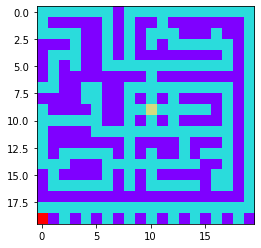

In [5]:
%matplotlib inline
## Environment 3
#10x10env, 0=Wall,1=Free,2=Start,3=Goal
import cv2
import matplotlib.pyplot as plt
env3 = np.zeros((20,20))
env3[0,0:7]=1
env3[0,8:20]=1

env3[1,0]=1
env3[1,6]=1
env3[1,8]=1
env3[1,11]=1
env3[1,19]=1

env3[2,0:4]=1
env3[2,6]=1
env3[2,8]=1
env3[2,10:13]=1
env3[2,16:17]=1
env3[2,19]=1

env3[3,3]=1
env3[3,6]=1
env3[3,8]=1
env3[3,10]=1
env3[3,12:18]=1
env3[3,19]=1

env3[4,1:4]=1
env3[4,6]=1
env3[4,8]=1
env3[4,17]=1
env3[4,19]=1

env3[5,1]=1
env3[5,3]=1
env3[5,6:18]=1
env3[5,19]=1

env3[6,1]=1
env3[6,10]=1
env3[6,19]=1

env3[7,0:2]=1
env3[7,4:6]=1
env3[7,8:18]=1
env3[7,19]=1

env3[8,4:6]=1
env3[8,8]=1
env3[8,12]=1
env3[8,10]=1
env3[8,17]=1
env3[8,19]=1

env3[9,0]=1
env3[9,5]=1
env3[9,8:16]=1
env3[9,17]=1
env3[9,19]=1

env3[10,0:6]=1
env3[10,8]=1
env3[10,10]=1
env3[10,12]=1
env3[10,17]=1
env3[10,19]=1

env3[11,0]=1
env3[11,5:18]=1
env3[11,19]=1

env3[12,0]=1
env3[12,8]=1
env3[12,13]=1
env3[12,17]=1
env3[12,19]=1

env3[13,0]=1
env3[13,2:7]=1
env3[13,8]=1
env3[13,10]=1
env3[13,13]=1
env3[13,15:18]=1
env3[13,19]=1

env3[14,0:3]=1
env3[14,6:15]=1
env3[14,17]=1
env3[14,19]=1

env3[15,1]=1
env3[15,6]=1
env3[15,8]=1
env3[15,10]=1
env3[15,16:18]=1
env3[15,19]=1

env3[16,1:7]=1
env3[16,8]=1
env3[16,10:15]=1
env3[16,16:18]=1
env3[16,19]=1

env3[17,19]=1

env3[18,0:20]=1

env3[19,0]=1
env3[19,2]=1
env3[19,4]=1
env3[19,6]=1
env3[19,8]=1
env3[19,10]=1
env3[19,12]=1
env3[19,14]=1
env3[19,16]=1
env3[19,18]=1
env3[9,10] = 2
env3[19,0] = 3
#Fixed scene fields don't change, get possible StateSpaces

stateSpace3 = getSpaceState(env3,10,10)

actions3 = np.array(['N','E','S','W'])
Q3=np.zeros((stateSpace3.shape[0], actions3.shape[0]))
rewards3 = np.array([10000,-200,-0.5, -20]) #Reach Goal, Hit Wall, Make Move, Move onto already stepped

plt.imshow(env3, cmap='rainbow')
plt.show()
plt.close()

In [ ]:
#%matplotlib qt
%matplotlib inline
import random
from time import time
from ipywidgets import IntProgress
from IPython.display import display
from matplotlib import animation, rc
counters= np.array([]).astype('int')
epsilon = 0.9
learningRate = 0.7
gamme = 0.9
counter=0
max_episode=20
max_count=10000000000
episode=0
start_time = time()
f = IntProgress(min=0, max=max_episode)
display(f)
while episode < max_episode:
    ims = np.array([])
    done = False
    currentState = stateSpace3[0]
    counter = 0
    #print("Episode", episode)
    #One Episode
    while not done and counter < max_count:   
        f.value=episode
        if random.uniform(0,1)<epsilon:
            actionId = random.randrange(4) #Explore action
            a = actions3[0] #Choose Action
        else:
            state,stateId, stateSpace3, Q3=getState(currentState, stateSpace3, Q3)
            actionId = np.argmax(Q3[stateId, :])
            a = actions3[actionId]
        oldState=np.copy(currentState)
        currentState,myReward, done = whichAction(a,stateSpace3,currentState, rewards3, env3, Q3)
        if(done):
            print("DONE in Count:", counter)
        state,stateId,stateSpace3, Q3=getState(currentState, stateSpace3, Q3)
        oldState,oldStateId,stateSpace3, Q3=getState(oldState, stateSpace3, Q3)
        Q3[oldStateId,actionId] = Q3[oldStateId,actionId]+learningRate*(myReward+gamma*np.max(Q3[stateId, :])-Q3[oldStateId,actionId])
        im =  plt.imshow(state, cmap='cool')
        ims = np.append(ims,[state])
        #plt.show()
        counter = counter + 1
    episode=episode+1
    #print("Steps: ", counter)
    counters=np.append(counters,counter)
    if(episode==1):
        epsilon=0.3
        #Q3=np.zeros((stateSpace3.shape[0], actions3.shape[0])) #WarmUp Ended
        max_count=700
    #if(episode == 300):
       # epsilon=0.2
    #if(episode == 800):
      #  epsilon=0.05
   # if(episode == 900):
      #  epsilon=0.01
    #if(episode == 950):
      #  epsilon=0.00
    

end_time = time()
seconds_elapsed = end_time - start_time
print("Seconds", seconds_elapsed)
plt.close()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
t = np.arange(0, episode, 1)
ax.plot(t, counters)

ax.set(xlabel='episodes', ylabel='steps',
       title='Steps per episode')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [ ]:
#np.savetxt('test2.txt', Q3)

In [ ]:
%matplotlib notebook
done=False
 #Grow State Space
states = np.zeros([1,20,20])
states[0]=stateSpace3[0]
currentState = stateSpace3[0]
ims = []
fig = plt.figure()
while not done:   
    state,stateId, stateSpace3, Q3=getState(currentState, stateSpace3, Q3)
    actionId = np.argmax(Q3[stateId, :])
    a = actions3[actionId]
    
    currentState,myReward, done = whichAction(a,stateSpace3,currentState, rewards3, env3, Q3)
    #plt.imshow(currentState, cmap='cool')
    #plt.show()
    states=np.append(states,[currentState], axis=0)
    im = plt.imshow(currentState, cmap='cool', animated=True)#
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=5)
plt.show()
plt.close()

In [30]:
##Trying DL
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.advanced_activations import PReLU
from keras.layers import Activation
from keras.layers import Dropout


import datetime
import random

In [20]:
class Qmaze(object):
    def __init__(self, maze, rat=(0,0), target=(19,0)):
        self._maze = np.array(maze)
        nrows, ncols = self._maze.shape
        #self.target = (nrows-1, ncols-1)   # target cell where the "cheese" is
        self.target = target
        self.free_cells = [(r,c) for r in range(nrows) for c in range(ncols) if self._maze[r,c] == 1.0]
        print(self.free_cells)
        self.free_cells.remove(self.target)
        if self._maze[self.target] == 0.0:
            raise Exception("Invalid maze: target cell cannot be blocked!")
        if not rat in self.free_cells:
            raise Exception("Invalid Rat Location: must sit on a free cell")
        self.reset(rat)

    def reset(self, rat):
        self.rat = rat
        self.maze = np.copy(self._maze)
        nrows, ncols = self.maze.shape
        row, col = rat
        self.maze[row, col] = rat_mark
        self.state = (row, col, 'start')
        self.min_reward = -0.5 * self.maze.size
        self.total_reward = 0
        self.visited = set()

    def update_state(self, action):
        nrows, ncols = self.maze.shape
        nrow, ncol, nmode = rat_row, rat_col, mode = self.state

        if self.maze[rat_row, rat_col] > 0.0:
            self.visited.add((rat_row, rat_col))  # mark visited cell

        valid_actions = self.valid_actions()
                
        if not valid_actions:
            nmode = 'blocked'
        elif action in valid_actions:
            nmode = 'valid'
            if action == LEFT:
                ncol -= 1
            elif action == UP:
                nrow -= 1
            if action == RIGHT:
                ncol += 1
            elif action == DOWN:
                nrow += 1
        else:                  # invalid action, no change in rat position
            mode = 'invalid'

        # new state
        self.state = (nrow, ncol, nmode)

    def get_reward(self):
        rat_row, rat_col, mode = self.state
        nrows, ncols = self.maze.shape
        if rat_row == nrows-1 and rat_col == ncols-1:
            return 1.0
        if mode == 'blocked':
            return self.min_reward - 1
        if (rat_row, rat_col) in self.visited:
            return -0.25
        if mode == 'invalid':
            return -0.75
        if mode == 'valid':
            return -0.04

    def act(self, action):
        self.update_state(action)
        reward = self.get_reward()
        self.total_reward += reward
        status = self.game_status()
        envstate = self.observe()
        return envstate, reward, status

    def observe(self):
        canvas = self.draw_env()
        envstate = canvas.reshape((1, -1))
        return envstate

    def draw_env(self):
        canvas = np.copy(self.maze)
        nrows, ncols = self.maze.shape
        # clear all visual marks
        for r in range(nrows):
            for c in range(ncols):
                if canvas[r,c] > 0.0:
                    canvas[r,c] = 1.0
        # draw the rat
        row, col, valid = self.state
        canvas[row, col] = rat_mark
        return canvas

    def game_status(self):
        if self.total_reward < self.min_reward:
            return 'lose'
        rat_row, rat_col, mode = self.state
        nrows, ncols = self.maze.shape
        if rat_row == nrows-1 and rat_col == ncols-1:
            return 'win'

        return 'not_over'

    def valid_actions(self, cell=None):
        if cell is None:
            row, col, mode = self.state
        else:
            row, col = cell
        actions = [0, 1, 2, 3]
        nrows, ncols = self.maze.shape
        if row == 0:
            actions.remove(1)
        elif row == nrows-1:
            actions.remove(3)

        if col == 0:
            actions.remove(0)
        elif col == ncols-1:
            actions.remove(2)

        if row>0 and self.maze[row-1,col] == 0.0:
            actions.remove(1)
        if row<nrows-1 and self.maze[row+1,col] == 0.0:
            actions.remove(3)

        if col>0 and self.maze[row,col-1] == 0.0:
            actions.remove(0)
        if col<ncols-1 and self.maze[row,col+1] == 0.0:
            actions.remove(2)

        return actions

In [21]:
class Experience(object):
    def __init__(self, model, max_memory=100, discount=0.95):
        self.model = model
        self.max_memory = max_memory
        self.discount = discount
        self.memory = list()
        self.num_actions = model.output_shape[-1]

    def remember(self, episode):
        # episode = [envstate, action, reward, envstate_next, game_over]
        # memory[i] = episode
        # envstate == flattened 1d maze cells info, including rat cell (see method: observe)
        self.memory.append(episode)
        if len(self.memory) > self.max_memory:
            del self.memory[0]

    def predict(self, envstate):
        return self.model.predict(envstate)[0]

    def get_data(self, data_size=10):
        env_size = self.memory[0][0].shape[1]   # envstate 1d size (1st element of episode)
        mem_size = len(self.memory)
        data_size = min(mem_size, data_size)
        inputs = np.zeros((data_size, env_size))
        targets = np.zeros((data_size, self.num_actions))
        for i, j in enumerate(np.random.choice(range(mem_size), data_size, replace=False)):
            envstate, action, reward, envstate_next, game_over = self.memory[j]
            inputs[i] = envstate
            # There should be no target values for actions not taken.
            targets[i] = self.predict(envstate)
            # Q_sa = derived policy = max quality env/action = max_a' Q(s', a')
            Q_sa = np.max(self.predict(envstate_next))
            if game_over:
                targets[i, action] = reward
            else:
                # reward + gamma * max_a' Q(s', a')
                targets[i, action] = reward + self.discount * Q_sa
        return inputs, targets

In [22]:
def play_game(model, qmaze, rat_cell):
    qmaze.reset(rat_cell)
    envstate = qmaze.observe()
    while True:
        prev_envstate = envstate
        # get next action
        q = model.predict(prev_envstate)
        action = np.argmax(q[0])

        # apply action, get rewards and new state
        envstate, reward, game_status = qmaze.act(action)
        if game_status == 'win':
            return True
        elif game_status == 'lose':
            return False


def show(qmaze):
    plt.grid('on')
    nrows, ncols = qmaze.maze.shape
    ax = plt.gca()
    ax.set_xticks(np.arange(0.5, nrows, 1))
    ax.set_yticks(np.arange(0.5, ncols, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    canvas = np.copy(qmaze.maze)
    for row,col in qmaze.visited:
        canvas[row,col] = 0.6
    rat_row, rat_col, _ = qmaze.state
    canvas[rat_row, rat_col] = 0.3   # rat cell
    canvas[nrows-1, ncols-1] = 0.9 # cheese cell
    img = plt.imshow(canvas, interpolation='none', cmap='gray')
    return img

def completion_check(model, qmaze):
    for cell in qmaze.free_cells:
        if not qmaze.valid_actions(cell):
            return False
        if not play_game(model, qmaze, cell):
            return False
    return True

In [23]:
def qtrain(model, maze, **opt):
    global epsilon
    n_epoch = opt.get('n_epoch', 15000)
    max_memory = opt.get('max_memory', 1000)
    data_size = opt.get('data_size', 50)
    weights_file = opt.get('weights_file', "")
    name = opt.get('name', 'model')
    start_time = datetime.datetime.now()

    # If you want to continue training from a previous model,
    # just supply the h5 file name to weights_file option
    if weights_file:
        print("loading weights from file: %s" % (weights_file,))
        model.load_weights(weights_file)

    # Construct environment/game from numpy array: maze (see above)
    qmaze = Qmaze(maze)

    # Initialize experience replay object
    experience = Experience(model, max_memory=max_memory)

    win_history = []   # history of win/lose game
    n_free_cells = len(qmaze.free_cells)
    hsize = qmaze.maze.size//2   # history window size
    win_rate = 0.0
    imctr = 1

    for epoch in range(n_epoch):
        loss = 0.0
        rat_cell = random.choice(qmaze.free_cells)
        qmaze.reset(rat_cell)
        game_over = False

        # get initial envstate (1d flattened canvas)
        envstate = qmaze.observe()

        n_episodes = 0
        while not game_over:
            valid_actions = qmaze.valid_actions()
            if not valid_actions: break
            prev_envstate = envstate
            # Get next action
            if np.random.rand() < epsilon:
                action = random.choice(valid_actions)
            else:
                action = np.argmax(experience.predict(prev_envstate))

            # Apply action, get reward and new envstate
            envstate, reward, game_status = qmaze.act(action)
            if game_status == 'win':
                win_history.append(1)
                game_over = True
            elif game_status == 'lose':
                win_history.append(0)
                game_over = True
            else:
                game_over = False

            # Store episode (experience)
            episode = [prev_envstate, action, reward, envstate, game_over]
            experience.remember(episode)
            n_episodes += 1

            # Train neural network model
            inputs, targets = experience.get_data(data_size=data_size)
            h = model.fit(
                inputs,
                targets,
                epochs=8,
                batch_size=16,
                verbose=0,
            )
            loss = model.evaluate(inputs, targets, verbose=0)

        if len(win_history) > hsize:
            win_rate = sum(win_history[-hsize:]) / hsize
    
        dt = datetime.datetime.now() - start_time
        t = format_time(dt.total_seconds())
        template = "Epoch: {:03d}/{:d} | Loss: {:.4f} | Episodes: {:d} | Win count: {:d} | Win rate: {:.3f} | time: {}"
        print(template.format(epoch, n_epoch-1, loss, n_episodes, sum(win_history), win_rate, t))
        # we simply check if training has exhausted all free cells and if in all
        # cases the agent won
        if win_rate > 0.4 : epsilon = 0.1
        if win_rate > 0.9 : epsilon = 0.05
        if sum(win_history[-hsize:]) == hsize and completion_check(model, qmaze):
            print("Reached 100%% win rate at epoch: %d" % (epoch,))
            break

    # Save trained model weights and architecture, this will be used by the visualization code
    h5file = name + ".h5"
    json_file = name + ".json"
    model.save_weights(h5file, overwrite=True)
    with open(json_file, "w") as outfile:
        json.dump(model.to_json(), outfile)
    end_time = datetime.datetime.now()
    dt = datetime.datetime.now() - start_time
    seconds = dt.total_seconds()
    t = format_time(seconds)
    print('files: %s, %s' % (h5file, json_file))
    print("n_epoch: %d, max_mem: %d, data: %d, time: %s" % (epoch, max_memory, data_size, t))
    return seconds

# This is a small utility for printing readable time strings:
def format_time(seconds):
    if seconds < 400:
        s = float(seconds)
        return "%.1f seconds" % (s,)
    elif seconds < 4000:
        m = seconds / 60.0
        return "%.2f minutes" % (m,)
    else:
        h = seconds / 3600.0
        return "%.2f hours" % (h,)

In [24]:
def build_model(maze, lr=0.001):
    model = Sequential()
    model.add(Dense(maze.size, input_shape=(maze.size,)))
    model.add(PReLU())
    model.add(Dense(maze.size))
    model.add(PReLU())
    model.add(Dense(num_actions))
    model.compile(optimizer='sgd', loss='mse')
    return model

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 6), (1, 8), (1, 11), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 6), (2, 8), (2, 10), (2, 11), (2, 12), (2, 16), (2, 19), (3, 3), (3, 6), (3, 8), (3, 10), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 19), (4, 1), (4, 2), (4, 3), (4, 6), (4, 8), (4, 17), (4, 19), (5, 1), (5, 3), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 19), (6, 1), (6, 10), (6, 19), (7, 0), (7, 1), (7, 4), (7, 5), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 19), (8, 4), (8, 5), (8, 8), (8, 10), (8, 12), (8, 17), (8, 19), (9, 0), (9, 5), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 17), (9, 19), (10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 8), (10, 10), (10, 12), (10, 17), (10, 19

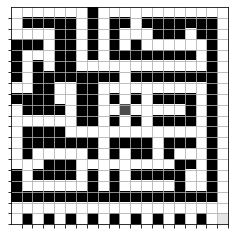

In [25]:
%matplotlib inline
visited_mark = 0.8  # Cells visited by the rat will be painted by gray 0.8
rat_mark = 0.5      # The current rat cell will be painteg by gray 0.5
LEFT = 0
UP = 1
RIGHT = 2
DOWN = 3

# Actions dictionary
actions_dict = {
    LEFT: 'left',
    UP: 'up',
    RIGHT: 'right',
    DOWN: 'down',
}

num_actions = len(actions_dict)



maze =  np.array([
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  0.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  0.,  0.,  1.],
    [ 1.,  0.,  0.,  0.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.]
])
maze2 = np.copy(env3)
maze2[9,10]=1
maze2[19,0]=1
qmaze = Qmaze(maze2, rat=(9,10),target=(19,0))
show(qmaze)

In [35]:
def build_model(maze, lr=0.001):
    model = Sequential()
    model.add(Dense(maze.size, input_shape=(maze.size,)))
    model.add(PReLU())
    model.add(Dense(maze.size))
    model.add(PReLU())
    model.add(Dense(num_actions))
    model.compile(optimizer='sgd', loss='mse')
    return model

def build_model(maze, lr=0.001):
    model = Sequential()
    model.add(Dense(maze.size, input_shape=(maze.size,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(maze.size))
    model.add(Activation('relu'))
    model.add(Dense(maze.size))
    model.add(Activation('softmax'))
    model.add(Dense(num_actions))
    model.compile(optimizer='sgd', loss='mse')
    return model

In [36]:
learningRate=0.85
epsilon = 0.4


model = build_model(maze2, learningRate)
qtrain(model, maze2, epochs=1000, max_memory=8*maze.size, data_size=32)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 6), (1, 8), (1, 11), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 6), (2, 8), (2, 10), (2, 11), (2, 12), (2, 16), (2, 19), (3, 3), (3, 6), (3, 8), (3, 10), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 19), (4, 1), (4, 2), (4, 3), (4, 6), (4, 8), (4, 17), (4, 19), (5, 1), (5, 3), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 19), (6, 1), (6, 10), (6, 19), (7, 0), (7, 1), (7, 4), (7, 5), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 19), (8, 4), (8, 5), (8, 8), (8, 10), (8, 12), (8, 17), (8, 19), (9, 0), (9, 5), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 17), (9, 19), (10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 8), (10, 10), (10, 12), (10, 17), (10, 19

KeyboardInterrupt: 